# Fraud Instance Detection

<img src="Fraudister data types.png" />

In [4]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Read the Fraud Instance data into a dataframe
fraud_df = pd.read_csv('Fraud Instance  Raw Data.csv')
fraud_df.head()

,Fraud Instance,Damaged Item,Item Not Avaiable,Item Not In Stock,Product Care Plan,Claim Amount,Registered Online,Age Group,Marital Status,Owns a Vehicle,Accomodation Type,Height (cms)
0,0,1,0,1,0,$89,1,29,In-Relationship,1,Owns a house,155
1,0,0,0,1,1,$290,0,33,Married,1,Staying with Family,178
2,0,1,0,0,1,$67,0,39,Married,1,Staying with Family,156
3,1,0,0,1,0,$350,0,49,In-Relationship,1,Rented,187
4,0,1,0,0,1,$297,0,37,In-Relationship,1,Staying with Family,184


In [6]:
#check the shape of the df
rows, columns = fraud_df.shape
print(rows, columns)

4349 12


In [7]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 12 columns):
Fraud Instance       4349 non-null int64
Damaged Item         4349 non-null int64
Item Not Avaiable    4349 non-null int64
Item Not In Stock    4349 non-null int64
Product Care Plan    4349 non-null int64
Claim Amount         4349 non-null object
Registered Online    4349 non-null int64
Age Group            4349 non-null int64
Marital Status       4349 non-null object
Owns a Vehicle       4349 non-null int64
Accomodation Type    4349 non-null object
Height (cms)         4349 non-null int64
dtypes: int64(9), object(3)
memory usage: 407.8+ KB


In [8]:
# check for missing values in any of the columns
fraud_df.columns[fraud_df.isnull().any()].tolist()

#looks like there are none

[]

% fraud =  0.392274085997


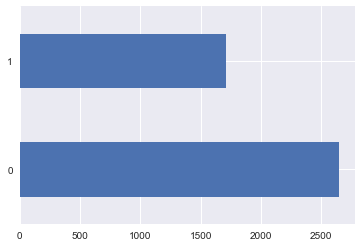

In [9]:
# See the % fraud instances 
fraud_instances = fraud_df['Fraud Instance'].value_counts()
fraud_instances.plot.barh()
print('% fraud = ', fraud_instances[1]/rows)

193.7581024169922

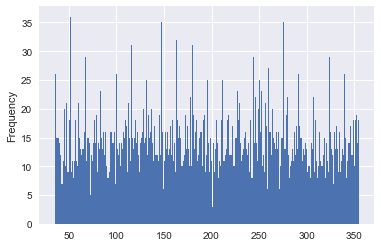

In [10]:
#Convert claim amount to int  
fraud_df['Claim Amount'].astype(str)
#remove the $ & convert to integer
fraud_df['Claim Amount'] = fraud_df['Claim Amount'].apply(lambda x: x[1:])
fraud_df['Claim Amount'] = pd.to_numeric(fraud_df['Claim Amount'], downcast= 'float' ) 
fraud_df['Claim Amount'].plot.hist(bins = 300)
fraud_df['Claim Amount'].mean()

36.40262129225109

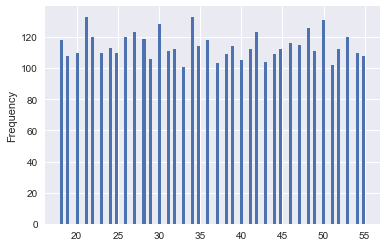

In [11]:
fraud_df['Age Group'].plot.hist(bins = 100)
fraud_df['Age Group'].mean()

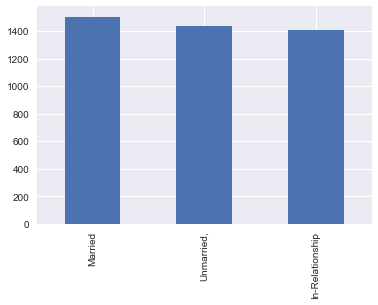

In [12]:
fraud_df['Marital Status'].value_counts().plot.bar()

In [13]:
#One hot encode Martial Status 
m_stat_enc = pd.get_dummies(fraud_df['Marital Status'])
fraud_df_enc = fraud_df.join(m_stat_enc)
fraud_df_enc = fraud_df_enc.drop('Marital Status', axis=1)
fraud_df_enc

,Fraud Instance,Damaged Item,Item Not Avaiable,Item Not In Stock,Product Care Plan,Claim Amount,Registered Online,Age Group,Owns a Vehicle,Accomodation Type,Height (cms),In-Relationship,Married,"Unmarried,"
0,0,1,0,1,0,89.0,1,29,1,Owns a house,155,1,0,0
1,0,0,0,1,1,290.0,0,33,1,Staying with Family,178,0,1,0
2,0,1,0,0,1,67.0,0,39,1,Staying with Family,156,0,1,0
3,1,0,0,1,0,350.0,0,49,1,Rented,187,1,0,0
4,0,1,0,0,1,297.0,0,37,1,Staying with Family,184,1,0,0
5,0,1,0,1,0,52.0,1,25,1,Owns a house,157,1,0,0
6,1,0,0,0,1,294.0,1,55,1,Owns a house,173,1,0,0
7,0,0,1,1,0,329.0,1,34,1,Rented,169,0,1,0
8,1,1,0,0,0,122.0,1,49,1,Rented,185,0,1,0
9,1,0,0,0,1,246.0,0,42,0,Owns a house,159,1,0,0


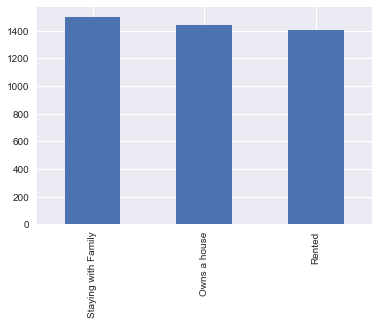

In [14]:
fraud_df['Accomodation Type'].value_counts().plot.bar()

In [15]:
#One hot encode Accomodation Type
at_enc = pd.get_dummies(fraud_df_enc['Accomodation Type'])
fraud_df_enc = fraud_df_enc.join(at_enc)
fraud_df_enc = fraud_df_enc.drop('Accomodation Type', axis=1)
fraud_df_enc.head()

,Fraud Instance,Damaged Item,Item Not Avaiable,Item Not In Stock,Product Care Plan,Claim Amount,Registered Online,Age Group,Owns a Vehicle,Height (cms),In-Relationship,Married,"Unmarried,",Owns a house,Rented,Staying with Family
0,0,1,0,1,0,89.0,1,29,1,155,1,0,0,1,0,0
1,0,0,0,1,1,290.0,0,33,1,178,0,1,0,0,0,1
2,0,1,0,0,1,67.0,0,39,1,156,0,1,0,0,0,1
3,1,0,0,1,0,350.0,0,49,1,187,1,0,0,0,1,0
4,0,1,0,0,1,297.0,0,37,1,184,1,0,0,0,0,1


Item Not In Stock     -0.335897
Damaged Item          -0.305781
Product Care Plan     -0.243785
Item Not Avaiable     -0.186731
Height (cms)          -0.025554
Rented                -0.013800
In-Relationship       -0.009382
Registered Online     -0.008751
Married               -0.005534
Staying with Family    0.000972
Age Group              0.003564
Claim Amount           0.010571
Owns a house           0.012740
Owns a Vehicle         0.014240
Unmarried,             0.014925
Name: Fraud Instance, dtype: float64


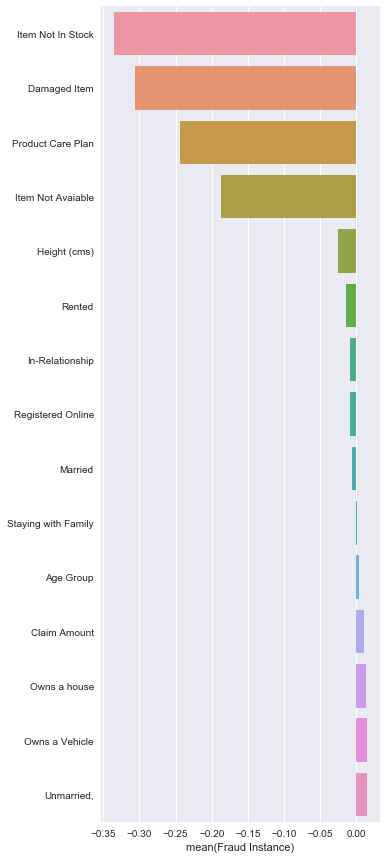

In [36]:
#Corrilation of the predicters to the response
#

corr = fraud_df_enc.corr()
#print(corr['Fraud Instance'].sort_values())
f_corr =corr['Fraud Instance'].sort_values()
f_corr = f_corr[:-1]
print(f_corr)
plt.figure(figsize=(5,15))
sns.barplot(y = f_corr.index, x=f_corr)    #corr["Fraud Instance"] )

In [223]:
fraud_df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 16 columns):
Fraud Instance         4349 non-null int64
Damaged Item           4349 non-null int64
Item Not Avaiable      4349 non-null int64
Item Not In Stock      4349 non-null int64
Product Care Plan      4349 non-null int64
Claim Amount           4349 non-null float32
Registered Online      4349 non-null int64
Age Group              4349 non-null int64
Owns a Vehicle         4349 non-null int64
Height (cms)           4349 non-null int64
In-Relationship        4349 non-null uint8
Married                4349 non-null uint8
Unmarried,             4349 non-null uint8
Owns a house           4349 non-null uint8
Rented                 4349 non-null uint8
Staying with Family    4349 non-null uint8
dtypes: float32(1), int64(9), uint8(6)
memory usage: 348.3 KB


In [38]:
from sklearn.model_selection import train_test_split

In [44]:
# setup train test split
X=fraud_df_enc.drop('Fraud Instance', axis=1)
y = fraud_df_enc['Fraud Instance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)


In [45]:
# build a decision tree to clasify the fraud instances
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)

In [46]:
imp = dtc.feature_importances_
c = X_train.axes
k = {'feature': c[1], "importance":imp }
feat_import = pd.DataFrame(k)
feat_import

,feature,importance
0,Damaged Item,0.335953
1,Item Not Avaiable,0.297068
2,Item Not In Stock,0.121310
3,Product Care Plan,0.245669
4,Claim Amount,0.000000
5,Registered Online,0.000000
6,Age Group,0.000000
7,Owns a Vehicle,0.000000
8,Height (cms),0.000000
9,In-Relationship,0.000000


In [47]:
#make a prediciton from the test data
pred = dtc.predict(X_test)

In [48]:
score = dtc.score(X_test, y_test)
score

1.0

In [49]:
# create a df with acual vs predicted
d = {'actual': y_test, "predicted": pred}
compare = pd.DataFrame(d)
compare['match']= (compare['actual'] == compare['predicted'])
compare.head()

,actual,predicted,match
2874,1,1,True
213,1,1,True
2672,0,0,True
662,0,0,True
695,0,0,True
